In [9]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
import matplotlib.pyplot as plt 

In [10]:
(x_train,_),(x_test,_)=keras.datasets.mnist.load_data()
x_train=x_train.reshape((x_train.shape[0],-1)).astype('float32')/255.0
x_test=x_test.reshape((x_test.shape[0],-1)).astype('float32')/255.0

In [11]:
input_dim=784
hidden_dim=64
sparsity_level=0.05
lambda_sparse=0.1

In [12]:
inputs=layers.Input(shape=(input_dim,))
encoded=layers.Dense(hidden_dim,activation="relu")(inputs)
decoded=layers.Dense(input_dim,activation="sigmoid")(encoded)
autoencoder=keras.Model(inputs,decoded)
encoder=keras.Model(inputs,encoded)

In [13]:
def sparse_loss(y_true,y_pred):
    mse_loss=tf.reduce_mean(keras.losses.MeanSquaredError()(y_true,y_pred))
    hidden_layer_output=encoder(y_true)
    mean_activation=tf.reduce_mean(hidden_layer_output,axis=0)
    kl_divergence=tf.reduce_sum(sparsity_level*tf.math.log(sparsity_level/(mean_activation+1e-10))+(1-sparsity_level)*tf.math.log((1-sparsity_level)/(1-mean_activation+1e-10)))
    return mse_loss+lambda_sparse*kl_divergence

In [14]:
autoencoder.compile(optimizer="adam",loss=sparse_loss)

In [15]:
history=autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2698
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1115
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0795
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0655
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0578
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0528
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0499
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0472
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0456
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0439
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0424
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0417
Epoch 13/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0402
Epoch 14/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0393
Epoch 15/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

In [16]:
reconstructed=autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step


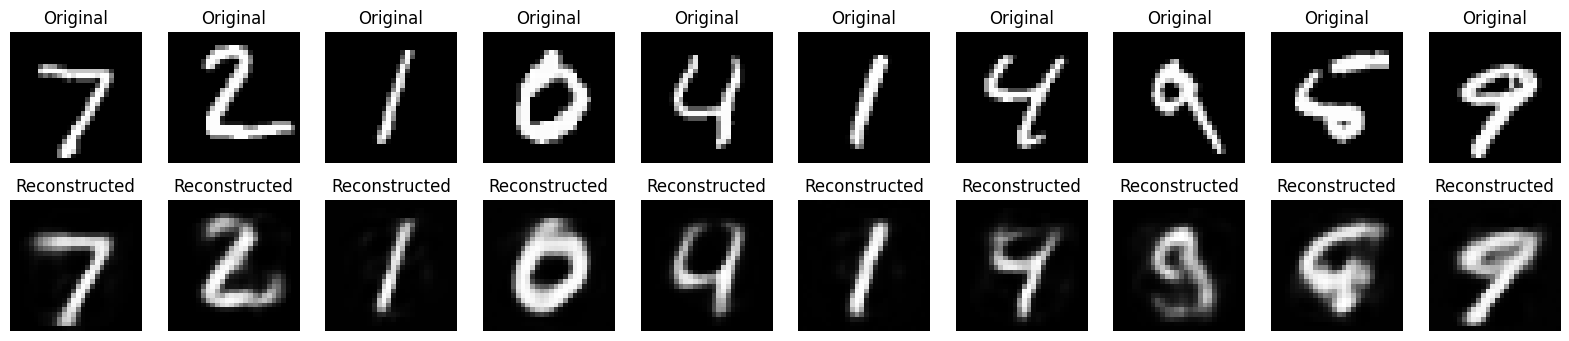

In [17]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap="gray")
    plt.title("Original")
    plt.axis("off")

    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(reconstructed[i].reshape(28,28),cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step


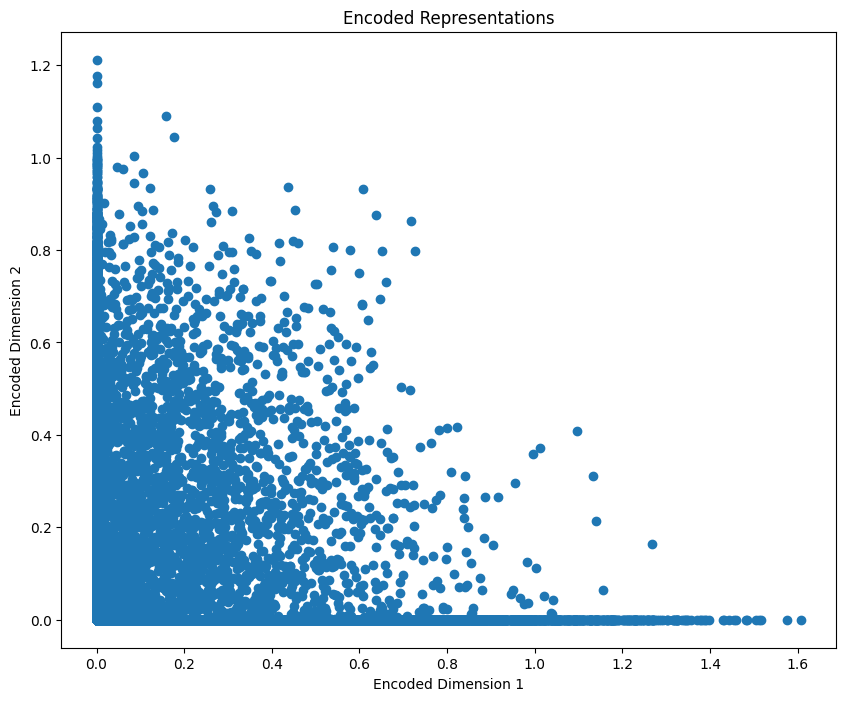

In [18]:
encoded_outputs=encoder.predict(x_train)
plt.figure(figsize=(10,8))
plt.scatter(encoded_outputs[:,0],encoded_outputs[:,1])
plt.title("Encoded Representations")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.show()

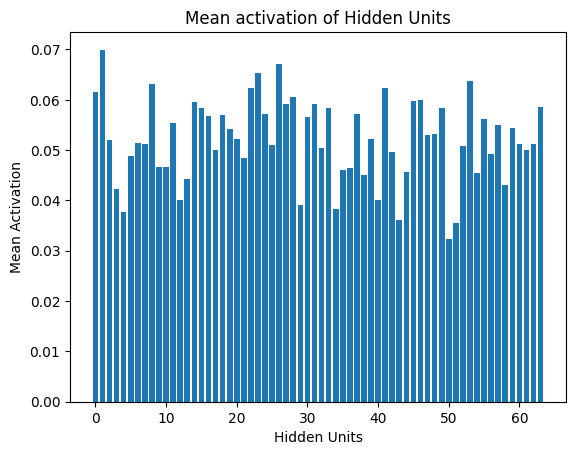

In [19]:
mean_activation=np.mean(encoded_outputs,axis=0)
plt.bar(range(len(mean_activation)),mean_activation)
plt.title("Mean activation of Hidden Units")
plt.xlabel("Hidden Units")
plt.ylabel("Mean Activation")
plt.show()